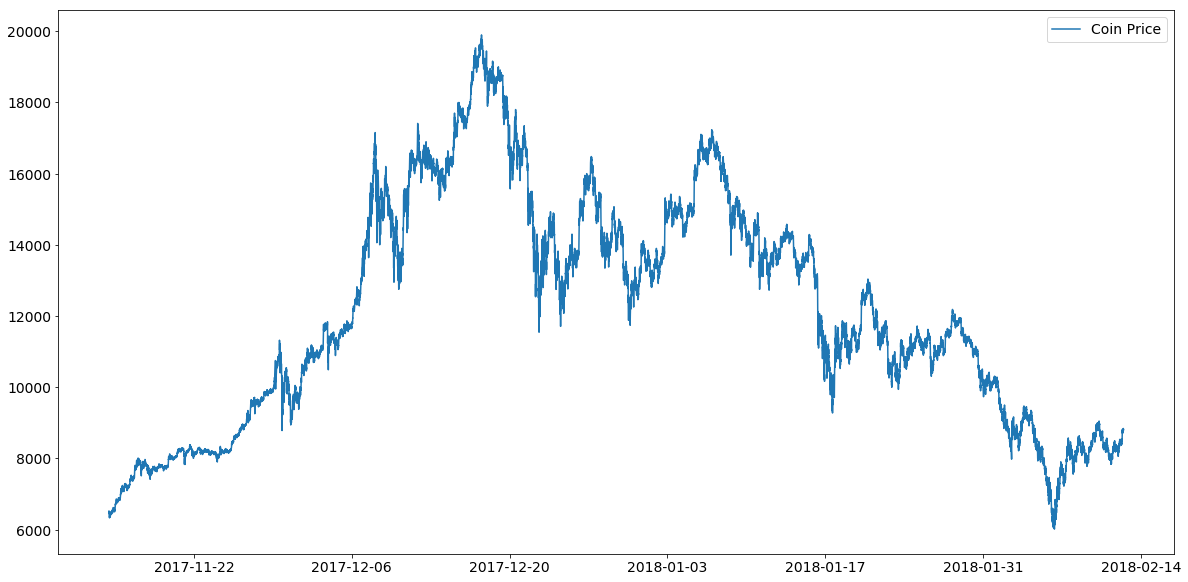

epoch       main/loss   validation/main/loss
1           0.00344367  0.291254              
2           0.000307757  0.278007              
3           0.000231316  0.267278              
4           0.000188763  0.25593               
5           0.000164118  0.244804              
6           0.000149885  0.240639              
7           0.000141518  0.235713              
8           0.000136265  0.235817              
9           0.000132903  0.233685              
10          0.000130399  0.231086              
11          0.000128774  0.22894               
12          0.000127076  0.230602              
13          0.000125892  0.228289              
14          0.000124556  0.231789              
15          0.000123583  0.228729              
16          0.000122445  0.229101              
17          0.000121445  0.231296              
18          0.000120551  0.230668              
19          0.000119503  0.230272              
20          0.000118519  0.228171           

In [1]:
import matplotlib.pyplot as plt
from chainer import Variable
import data_manager
import constants
import main

%matplotlib inline

# coin pairs: USDT-Bitcoin
df = data_manager.return_chart_data(constants.PAIR_USDT_BTC, constants.PERIOD, constants.DAY)

time_train, time_cv, time_test, x_train, x_cv, x_test, y_train, y_cv, y_test_not_normalized, y_scaler = data_manager.prepare_data(df)

trainer, model = main.initialize_trainer(x_train, y_train, x_cv, y_cv)
trainer.run()

## Predict the cross-validaton data set:

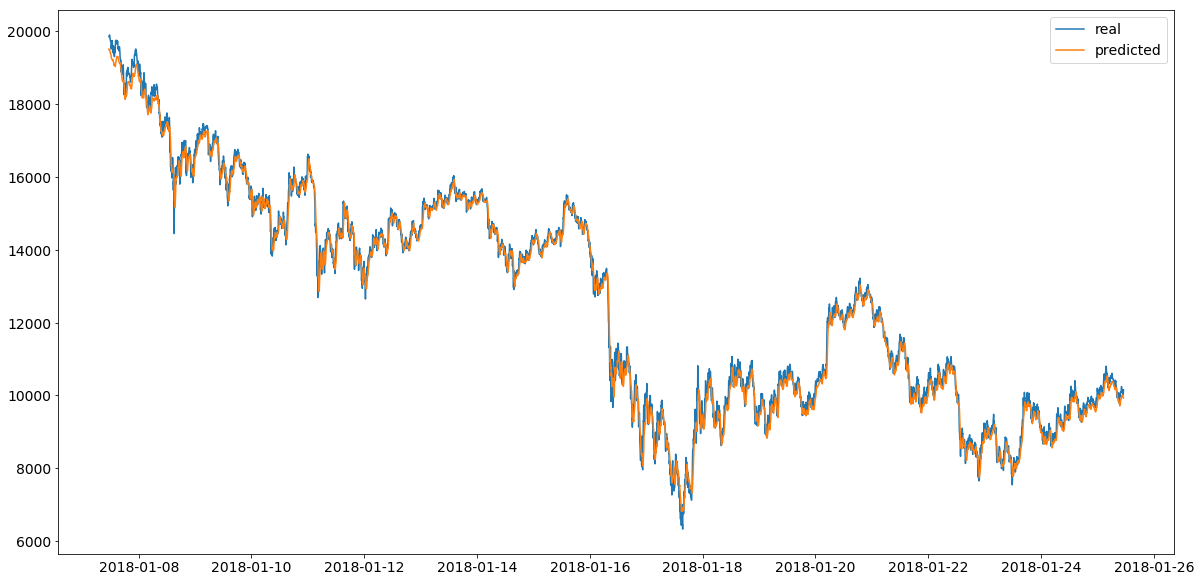

In [2]:
model.reset_state()
y_pred_cv = model.predict(Variable(x_cv)).data

plt.figure(figsize=(20,10))
plt.plot(time_cv, y_scaler.inverse_transform(y_cv), label = "real")
plt.plot(time_cv, y_scaler.inverse_transform(y_pred_cv), label = "predicted")
plt.legend(loc='best', fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

## Next, predict the test data set:
one-step forward prediciton statergy is used here

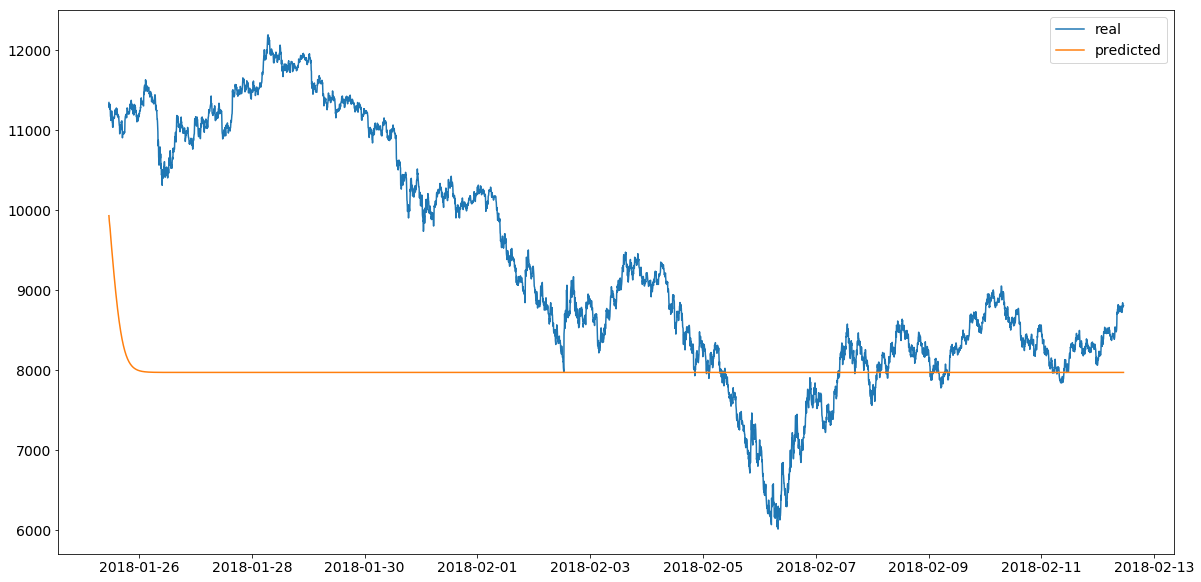

In [3]:
y_pred_test = main.predict_y_test(x_cv[-1], model, y_test_not_normalized)

plt.figure(figsize=(20,10))
plt.plot(time_test, y_test_not_normalized, label = "real")
plt.plot(time_test, y_scaler.inverse_transform(y_pred_test), label = "predicted")
plt.legend(loc='best', fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

As the predictions on cross-validation data set are quite similar to real price values, at least I can say that the learning process is going well.

While the predictions on test data set look like a straight line that means our model is overfitted and the predictions are not going well.

In a neural network, in general an activation function on the output layer is needed to scale outpus to the same range as the target variable price.
In this attempt, instead of using an activation function, I scaled target variable price to 0~1, and after predicting, we inversed the predictions to the original scale.

So here comes the problems.

I created a scaler for 80% of the whole data set, and finally used this scaler to inverse the rest 20% which is the test data set. Simply consider this process as following:
1. get a scaler from step 1. Simply consider ther scaler as a float number max_val which is the max value
2. normalize 80% of the whole dataset(scale to 0~1). Simply consider this step as values/max_val
3. after prediction I'll use the above scaler to inverse the predictions. Simply consider this step as predictions*max_val

Now let's see the first graph in this notebook, obviously the max_value of the first 80% is totally different to that of the rest 20%, the above process make it difficult to inverse the predictions. So as a conclusion, normalizing target variables is not a good idea as the scale is not always the same on each data set.
(Though this approach performs well on the CV data set)

Finally, let's zoom out the very beginning of the predictions to see what happened.

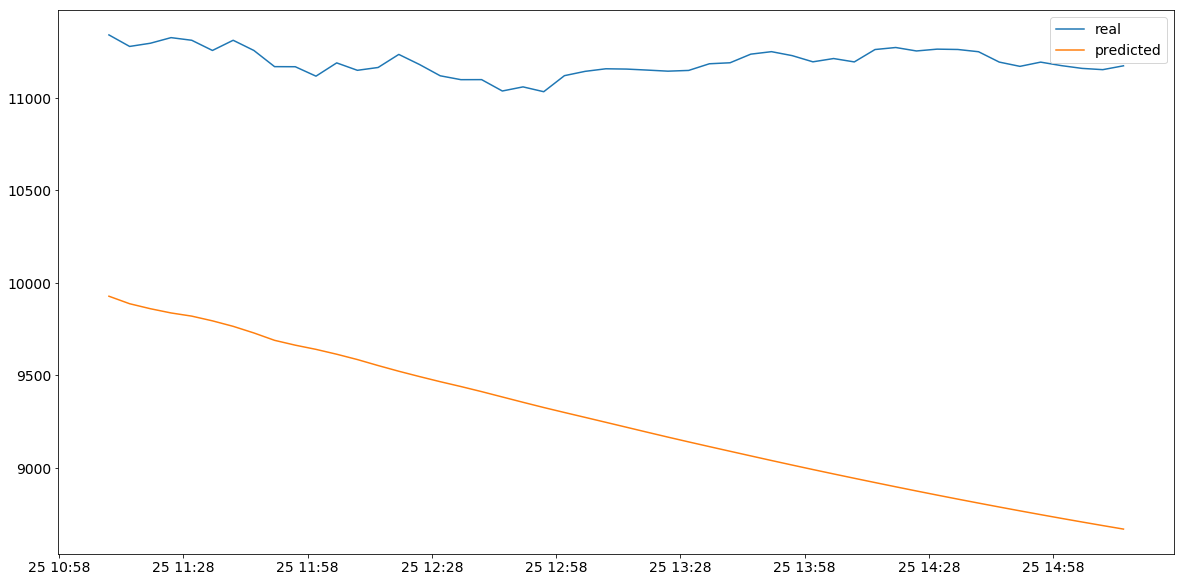

In [4]:
plt.figure(figsize=(20,10))
# plot predictions
plt.plot(time_test[:50], y_test_not_normalized[:50], label = "real")
plt.plot(time_test[:50], y_scaler.inverse_transform(y_pred_test)[:50], label = "predicted")
plt.legend(loc='best', fontsize=14)
plt.tick_params(labelsize=14)
plt.show()